# Overview

Sequential models like(RNNs) were used in many machine learning tasks involving sequence data. Their inherent sequential structure hindered the speed of computation since each step depended on a hidden state from the last time step. Other techniques like passing the ground truth information(teacher forcing) to the input of the next time step were used to speed up training, but these techniques sometimes had a negative effect on the capacity of the model to generalise.

The Attention mechanism was introduced to make these sequence models more robust as they suffered from a vanishing gradient problem relative to the length of the sequence. This Enhanced the performance of sequence to sequence architectures on complex tasks such as machine translation.

The transformer was first introduced in 2017 in the paper (attention is all you need). Replacing the sequence modeling completely by the multi-head self attention mechanism.

# Positional encodings

The position of words is inherently encoded in the architecture of sequence models since the computation is done in time steps.


<div align="center">
    <img src="images/pos_encoding.png" width=220 height=300 alt="positional encoding - original transformer">
</div>

The position of words is an important piece of information for a language model, as the same word can have a different meaning depending on its position in the sequence; the meaning of the entire phrase can change if this information is not encoded in the model

In the original transformer paper, positional encodings were introduced to model this information.

### position vector:

The authors of the original transformer paper proposed a vector $p_t^i$ of size $d$ where $d$ is an even number representing the encoding position.


$p_t^{2k+1} = cos(w_k.t)$     and    $p_t^{2k} = sin(w_k.t)$    where :    $\omega_k = \frac{1}{10000^{2k/d}}$



In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
d, seq_len, nw = 512, 2048, 10000

In [12]:
p = np.zeros((seq_len, d))

In [13]:
for k in range(seq_len):
    for i in np.arange(d//2):
        div = np.power(nw, 2*i/d)
        p[k, 2*i] = np.sin(k/div)
        p[k, 2*i+1] = np.cos(k/div)

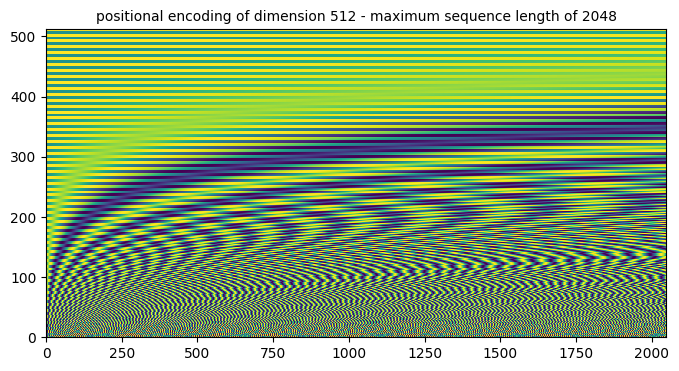

In [23]:
plt.figure(figsize=(8,4))
plt.pcolormesh(p.T)
plt.title("positional encoding of dimension 512 - maximum sequence length of 2048", fontsize=10, fontweight=10)
plt.show()

the distance between neighboring time-steps and changes nicely with time. Here is an illustration from the tensorflow official impelmentation

In [25]:
pos_encoding = p

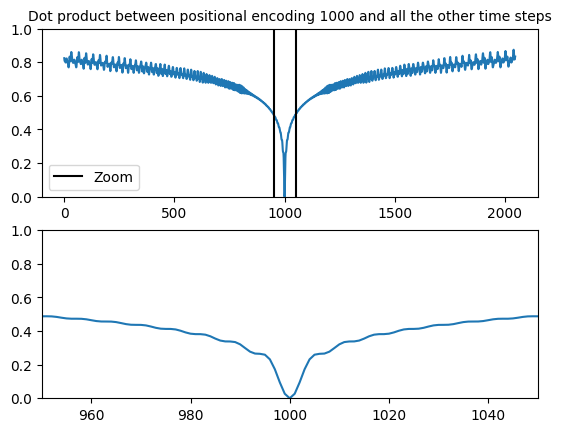

In [28]:
from numpy import linalg as LA

pos_encoding/=LA.norm(pos_encoding, axis=1, keepdims=True)
p = pos_encoding[1000]
dots = np.dot(pos_encoding, p)
plt.subplot(2,1,1)
plt.plot(1 - dots)
plt.ylim([0,1])
plt.title("Dot product between positional encoding 1000 and all the other time steps", fontsize=10, fontweight=10)
plt.plot([950, 950, float('nan'), 1050, 1050],[0,1,float('nan'),0,1], color='k', label='Zoom')
plt.legend()
plt.subplot(2,1,2)
plt.plot(1 - dots)
plt.xlim([950, 1050])
plt.ylim([0,1])
plt.show()

# Self Attention

# Multi-Head attention